In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Resources/data_withID.csv')
df.head()

,PPSORT,AGEIMM,BedRm,CMA,CONDO,COW,DIST,GENSTAT,HHSIZE,IMMCAT5,...,Wages,WKSWRK,aboriginal,age,STEM,YrEd,PrMinWage_V,PrMinWage_Vstat,PartTime,Married
0,218995,9,1,835,1,4,7,1,2,21,...,2000,44.0,0,47,0,18,11.20,11.20,0,1
1,671467,0,3,933,0,1,7,3,5,1,...,28000,50.5,0,37,0,14,10.45,10.45,0,1
2,112607,0,2,462,0,1,22,2,3,1,...,36000,50.5,0,27,1,13,10.75,10.75,0,1
3,153693,9,2,535,0,1,12,1,4,21,...,80000,50.5,0,52,0,14,11.25,11.25,0,1
4,468158,0,2,535,0,1,2,2,4,1,...,11000,50.5,0,42,0,9,11.25,11.25,1,1


In [3]:
#Mincer earnings function
df["YrEd2"]=df["YrEd"]^2

In [4]:
df.columns

Index(['PPSORT', 'AGEIMM', 'BedRm', 'CMA', 'CONDO', 'COW', 'DIST', 'GENSTAT',
       'HHSIZE', 'IMMCAT5', 'MODE', 'MTNEn', 'MTNFr', 'NAICS', 'NOC16', 'NOCS',
       'PKIDS', 'POWST', 'PR', 'PRIHM', 'PWDUR', 'PWLEAVE', 'ROOMS', 'Sex',
       'SHELCO', 'Subsidy', 'Tenur', 'VisMin', 'Wages', 'WKSWRK', 'aboriginal',
       'age', 'STEM', 'YrEd', 'PrMinWage_V', 'PrMinWage_Vstat', 'PartTime',
       'Married', 'YrEd2'],
      dtype='object')

In [5]:
y = df["Wages"]
X = df[['age','YrEd','YrEd2','STEM','PrMinWage_V','PartTime','Sex','Married']]

In [6]:
#get_dummies_CMA
dummies_CMA = pd.get_dummies(df.CMA)
X = X.join(dummies_CMA)

In [7]:
#get_dummies_NOC16
dummies_NOC16 = pd.get_dummies(df.NOC16)
X = X.join(dummies_NOC16)

In [8]:
X.columns

Index([        'age',        'YrEd',       'YrEd2',        'STEM',
       'PrMinWage_V',    'PartTime',         'Sex',     'Married',
                 205,           399,           421,           462,
                 499,           505,           532,           535,
                 537,           539,           541,           555,
                 559,           577,           588,           599,
                 602,           799,           825,           835,
                 933,           935,           988,           999,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,            26,            27,           


Regression


In [9]:
model = LinearRegression()

In [10]:
model.fit(X,y)

LinearRegression()

In [11]:
y_pred = model.predict(X)
print(y_pred.shape)

(11256,)


In [12]:
print(model.coef_)

[ 4.36879396e+02  7.70706916e+02 -3.40648857e+01  2.46331875e+03
  8.31715129e+03 -1.81858254e+04  1.04500372e+04  1.69487983e+03
 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14
 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14
 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14
 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14
 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14
 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14 -6.54558915e+14
  4.60587317e+14  4.60587317e+14  4.60587317e+14  4.60587317e+14
  4.60587317e+14  4.60587317e+14  4.60587317e+14  4.60587317e+14
  4.60587317e+14  4.60587317e+14  4.60587317e+14  4.60587317e+14
  4.60587317e+14  4.60587317e+14  4.60587317e+14  4.60587317e+14
  4.60587317e+14  4.60587317e+14  4.60587317e+14  4.60587317e+14
  4.60587317e+14  4.60587317e+14  4.60587317e+14  4.60587317e+14
  4.60587317e+14  4.60587317e+14  4.60587317e+14  4.60587317e+14
  4.60587317e+14  4.60587

In [13]:
print(model.intercept_)

193971597679103.6


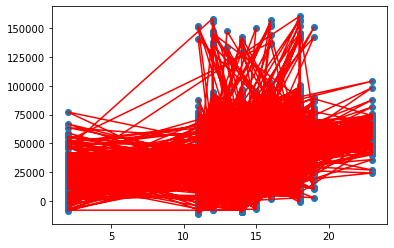

In [20]:
plt.scatter(X.YrEd2, y_pred)
plt.plot(X.YrEd2, y_pred, color='red')
plt.show()